In [ ]:
import csv
data=open('iris.data.txt', 'r')
lines =csv.reader(data)
for row in lines : 
  print (', '.join(row))


5.1, 3.5, 1.4, 0.2, Iris-setosa
4.9, 3.0, 1.4, 0.2, Iris-setosa
4.7, 3.2, 1.3, 0.2, Iris-setosa
4.6, 3.1, 1.5, 0.2, Iris-setosa
5.0, 3.6, 1.4, 0.2, Iris-setosa
5.4, 3.9, 1.7, 0.4, Iris-setosa
4.6, 3.4, 1.4, 0.3, Iris-setosa
5.0, 3.4, 1.5, 0.2, Iris-setosa
4.4, 2.9, 1.4, 0.2, Iris-setosa
4.9, 3.1, 1.5, 0.1, Iris-setosa
5.4, 3.7, 1.5, 0.2, Iris-setosa
4.8, 3.4, 1.6, 0.2, Iris-setosa
4.8, 3.0, 1.4, 0.1, Iris-setosa
4.3, 3.0, 1.1, 0.1, Iris-setosa
5.8, 4.0, 1.2, 0.2, Iris-setosa
5.7, 4.4, 1.5, 0.4, Iris-setosa
5.4, 3.9, 1.3, 0.4, Iris-setosa
5.1, 3.5, 1.4, 0.3, Iris-setosa
5.7, 3.8, 1.7, 0.3, Iris-setosa
5.1, 3.8, 1.5, 0.3, Iris-setosa
5.4, 3.4, 1.7, 0.2, Iris-setosa
5.1, 3.7, 1.5, 0.4, Iris-setosa
4.6, 3.6, 1.0, 0.2, Iris-setosa
5.1, 3.3, 1.7, 0.5, Iris-setosa
4.8, 3.4, 1.9, 0.2, Iris-setosa
5.0, 3.0, 1.6, 0.2, Iris-setosa
5.0, 3.4, 1.6, 0.4, Iris-setosa
5.2, 3.5, 1.5, 0.2, Iris-setosa
5.2, 3.4, 1.4, 0.2, Iris-setosa
4.7, 3.2, 1.6, 0.2, Iris-setosa
4.8, 3.1, 1.6, 0.2, Iris-setosa
5.4, 3.4

# Handle Data



In [ ]:
import random
def loadDataset(filename, split, trainingSet=[] , testSet=[]):
    with open(filename, 'r') as csvfile:
        lines = csv.reader(csvfile)
        dataset = list(lines)
        for x in range(len(dataset)):
            for y in range(4):
                dataset[x][y] = float(dataset[x][y])
            if random.random() < split:
                trainingSet.append(dataset[x])
            else:
                testSet.append(dataset[x])

In [ ]:
trainingSet=[]

testSet=[]

loadDataset('iris.data.txt', 0.66, trainingSet, testSet)

print ('Train: ' + repr(len(trainingSet)))

print ('Test: ' + repr(len(testSet)) )

Train: 103
Test: 47


# Similarity

In [ ]:
import math

def euclideanDistance(instance1, instance2, length):
  distance=0
  for x in range(0,length):
    distance+= math.pow((instance2[x]-instance1[x]),2)
  return math.sqrt(distance)

In [ ]:
data1 = [2, 2, 2, 'a']

data2 = [4, 4, 4, 'b']

distance = euclideanDistance(data1, data2, 3)

print ('Distance: ' + repr(distance))

Distance: 3.4641016151377544


# Neighbors

In [ ]:
import operator 
def getNeighbors(trainingSet, testInstance, k):

  distances = []

  length = len(testInstance)-1

  for x in range(len(trainingSet)):

    dist = euclideanDistance(testInstance, trainingSet[x], length)

    distances.append((trainingSet[x], dist))

    distances.sort(key=operator.itemgetter(1))

  neighbors = []

  for x in range(k):

    neighbors.append(distances[x][0])

  return neighbors

In [ ]:
trainSet = [[2, 2, 2, 'a'], [4, 4, 4, 'b']]

testInstance = [5, 5, 5]

k = 1

neighbors = getNeighbors(trainSet, testInstance, 1)

print(neighbors)

[[4, 4, 4, 'b']]


# Response

In [ ]:
import operator

def getResponse(neighbors):

  classVotes = {}

  for x in range(len(neighbors)):

    response = neighbors[x][ -1 ] #complete with appropriate number

    if response in classVotes:
            classVotes[response] += 1
    else:
            classVotes[response] = 1
      

  sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)

  return sortedVotes[0][0]

In [ ]:
neighbors = [[1,1,1,'a'], [2,2,2,'a'], [3,3,3,'b']]

response = getResponse(neighbors)

print(response)

a


# Accuracy

In [ ]:
def getAccuracy(testSet, predictions):
  correct=0 
  for x in range(len(predictions)) : 
    if(testSet[x][-1]==predictions[x]):
      correct+=1 
  return (correct/float(len(testSet))) * 100.0

In [ ]:
testSet = [[1,1,1,'a'], [2,2,2,'a'], [3,3,3,'b']]

predictions = ['a', 'a', 'a']

accuracy = getAccuracy(testSet, predictions)

print(accuracy)

66.66666666666666


# Main

In [ ]:
def main():
    trainingSet=[]
    testSet=[]
    split = 0.67
    loadDataset('iris.data.txt', split, trainingSet, testSet)
    print ('Train set: ' + repr(len(trainingSet)))
    print ('Test set: ' + repr(len(testSet)) )   
    predictions=[]
    k = 3
    for x in range(len(testSet)):
        neighbors = getNeighbors(trainingSet, testSet[x], k)
        result = getResponse(neighbors)
        predictions.append(result)
    accuracy = getAccuracy(testSet, predictions)
    print ('Accuracy: ', accuracy)

main()
#overfitting ?

Train set: 96
Test set: 54
Accuracy:  98.14814814814815


# Another distance metric

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import plotly.express as plt

In [ ]:
data=pd.read_csv("Iris.csv") 
data.head()
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
data["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [ ]:
data=data.drop(["Id","PetalLengthCm","PetalWidthCm"],axis=1)

In [ ]:
fig = plt.scatter(data, y="SepalWidthCm", x="SepalLengthCm", color="Species")
fig.show()

**Outliers**

In [ ]:
from scipy import stats 
from sklearn.preprocessing import LabelEncoder
import numpy as np
species={"Species":{"Iris-virginica":0,"Iris-versicolor":1,"Iris-setosa":2}}
data.replace(species,inplace=True)
z=np.abs(stats.zscore(data))
print(np.where(z>3))
data=data[(z<3).all(axis=1)]
data

(array([15]), array([1]))


,SepalLengthCm,SepalWidthCm,Species
0,5.1,3.5,2
1,4.9,3.0,2
2,4.7,3.2,2
3,4.6,3.1,2
4,5.0,3.6,2
...,...,...,...
145,6.7,3.0,0
146,6.3,2.5,0
147,6.5,3.0,0
148,6.2,3.4,0


In [ ]:
fig = plt.scatter(data, y="SepalWidthCm", x="SepalLengthCm", color="Species")
fig.show()

In [ ]:
x=data.drop(["Species"],axis=1)
y=data["Species"]


In [ ]:
from sklearn.model_selection import train_test_split 
(x_train, X_vt, y_train, y_vt) = train_test_split(x, y, test_size=0.4, random_state=0)
(x_validation, x_test, y_validation, y_test) = train_test_split(X_vt, y_vt, test_size=0.5, random_state=0)

**KNN optimal value**

In [ ]:
from sklearn.metrics import accuracy_score
for k in range(1,30): 
  knn=KNeighborsClassifier(n_neighbors=k,p=1)
  knn.fit(x_train,y_train)
  y_predict=knn.predict(x_test)
  print("accuracy for k = ",k, "is",accuracy_score(y_predict,y_test))
  #we choose k=5

accuracy for k =  1 is 0.6666666666666666
accuracy for k =  2 is 0.7
accuracy for k =  3 is 0.6666666666666666
accuracy for k =  4 is 0.6666666666666666
accuracy for k =  5 is 0.7666666666666667
accuracy for k =  6 is 0.7333333333333333
accuracy for k =  7 is 0.7
accuracy for k =  8 is 0.7333333333333333
accuracy for k =  9 is 0.7333333333333333
accuracy for k =  10 is 0.7333333333333333
accuracy for k =  11 is 0.7333333333333333
accuracy for k =  12 is 0.7333333333333333
accuracy for k =  13 is 0.7666666666666667
accuracy for k =  14 is 0.7666666666666667
accuracy for k =  15 is 0.7666666666666667
accuracy for k =  16 is 0.7
accuracy for k =  17 is 0.7333333333333333
accuracy for k =  18 is 0.7333333333333333
accuracy for k =  19 is 0.6666666666666666
accuracy for k =  20 is 0.6666666666666666
accuracy for k =  21 is 0.6666666666666666
accuracy for k =  22 is 0.6666666666666666
accuracy for k =  23 is 0.6333333333333333
accuracy for k =  24 is 0.6333333333333333
accuracy for k =  25 i

In [ ]:
  knn=KNeighborsClassifier(n_neighbors=5,p=1)
  knn.fit(x_train,y_train)
  y_predict=knn.predict(x_test)
  print("accuracy",accuracy_score(y_predict,y_test))


accuracy 0.7666666666666667


**Visualisation**


/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



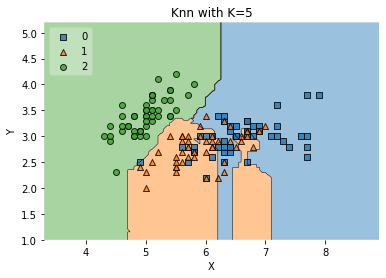

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x.values, y.values, clf=knn, legend=2)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Knn with K=5")
plt.show()

**Validation**

In [ ]:
y_validation_predict=knn.predict(x_validation)
print("accuracy",accuracy_score(y_validation_predict,y_validation))


accuracy 0.7
